<a href="https://colab.research.google.com/github/MonikaLamba/2-GeS/blob/main/ARIMA_FINAL_ALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('/content/data set arima12.csv',parse_dates=['Date'], index_col=['Date'])

In [45]:
df.head()

,Nifty 50
Date,
2019-01-01,10830.95020
2019-02-01,10792.50000
2019-03-01,11623.90039
2019-04-01,11748.15039
2019-05-01,11922.79981


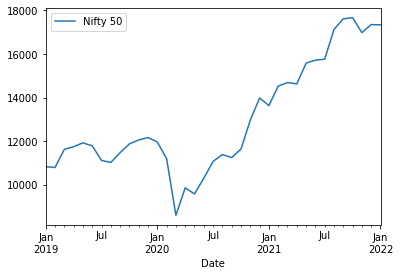

In [46]:
df.plot()

Stationarity Check

Resampling of data from daily to monthly

In [47]:
ts = df['Nifty 50'].resample('MS').sum()
ts.head()

Date
2019-01-01    10830.95020
2019-02-01    10792.50000
2019-03-01    11623.90039
2019-04-01    11748.15039
2019-05-01    11922.79981
Freq: MS, Name: Nifty 50, dtype: float64

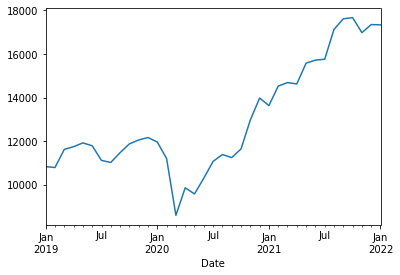

In [48]:
ts.plot()

In [49]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(ts,model='additive')
fig1 = decomposition.plot
plt.show()

In [50]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(ts,model='multiplicative')
fig2 = decomposition.plot
plt.show()

In [51]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(ts)
print('Pvalue of adfuller test is:', adftest[1])

Pvalue of adfuller test is: 0.9416974552024645


Train and Test

In [52]:
len(ts)

37

In [53]:
train = ts[:20]
test = ts[20:]

In [54]:
len(train)

20

In [55]:
len(test)

17

ARIMA MODEL BUILDING

In [56]:
!pip install pmdarima
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.arima.model.ARIMA import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train, order=(1,1,2)).fit()  
#model = sm.tsa.arima.ARIMA(train,order(1,0,1)).fit()

In [64]:
import warnings
warnings.filterwarnings('ignore')
pred=model.predict(start=len(train),end=(len(ts)-1))

In [65]:
from sklearn.metrics import mean_squared_error
error=np.sqrt(mean_squared_error(test,pred))
error

4300.6286344453365

In [66]:
test.mean(), np.sqrt(test.var())

(15205.449967058823, 2047.0597014115917)

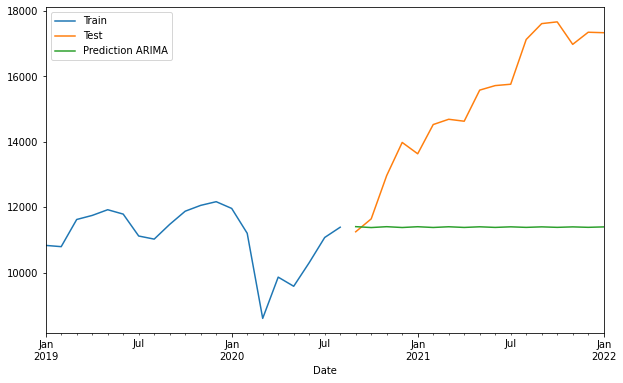

In [67]:
train.plot(legend=True, label="Train", figsize=(10,6))
test.plot(legend=True, label="Test")
pred.plot(legend=True, label="Prediction ARIMA")

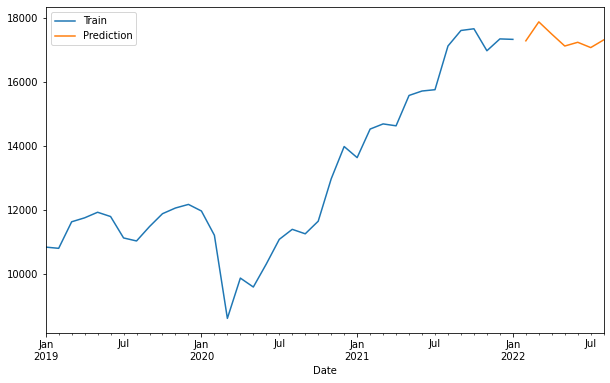

In [71]:
final_model = sm.tsa.arima.ARIMA(ts,order=(5,0,4)).fit()
prediction = final_model.predict(len(ts),len(ts)+6)
ts.plot(legend=True, label='Train',figsize=(10,6))
prediction.plot(legend=True,label="Prediction")

In [72]:
import itertools

In [74]:
p=range(0,8)
q=range(0,8)
d=range(0,2)


In [75]:
pdq_combination = list(itertools.product(p,q,d))
len(pdq_combination)

128

In [76]:
rmse=[]
order1=[]

In [84]:
for pdq in pdq_combination:
  try:
    model=ARIMA(train,order=pdq).fit()
    pred=model.predict(start=len(train),end=len(ts)-1)
    error=np.sqrt(mean_squared_error(test,pred))
    order1.append(pdq)
    rmse.append(error)

  except:
    continue   

In [85]:
results=pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])
results.to_csv('ARIMA_results.csv')

In [86]:
results

,RMSE
"(0, 0, 0)",4543.026098
"(0, 0, 1)",4537.927204
"(0, 1, 0)",15305.545529
"(0, 1, 1)",15306.507946
"(0, 2, 0)",15315.172267
"(0, 2, 1)",15348.235052
"(1, 0, 0)",4538.417456
"(1, 0, 1)",4537.463123
"(1, 1, 0)",15306.432803
"(1, 1, 1)",15306.239393


ACF PACF

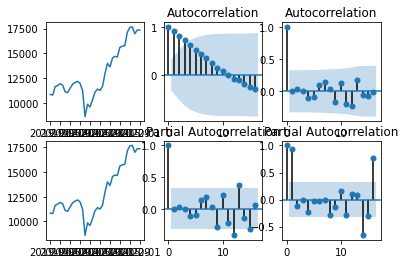

In [92]:
from pmdarima import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fix,axes=plt.subplots(2,3)
axes[0,0].plot(ts)
plot_acf(ts,ax=axes[0,1])
plot_acf(ts.diff().dropna(), ax=axes[0,2])
axes[1,0].plot(ts)
plot_pacf(ts.diff().dropna(),ax=axes[1,1])
plot_pacf(ts.dropna(),ax=axes[1,2])
plt.show()



In [93]:
import pmdarima
from pmdarima import auto_arima
auto_arima(train, m=12, start_P=0, seasonal=True, d=1, trace=True, error_action ='ignore',supress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=inf, Time=3.00 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=124.710, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=125.240, Time=0.17 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=126.641, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=126.636, Time=0.08 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=127.948, Time=0.20 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=126.668, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 4.675 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)